In [78]:
import matplotlib.pyplot as plt

from read_data import *
from changepoint_detection import *
from eigen_freq import *

In [79]:
data = process_data()

In [119]:
data['V17_0001']['dat']

,CH1_Moment,CH2_Kraft,CH3_SyncSig,CH4_akustik,CH5_a1_WSAS,CH6_a2_WSAF,CH7_a3_BOZA,time
0,12.5840,-92.988,11.5464,0.223717,-3.1496,-1.9056,0.38,0.00000
1,-1.3068,-39.032,11.5456,0.295259,-4.7800,-2.5024,1.75,0.00005
2,-6.1468,45.920,11.5464,0.356920,-3.4696,-1.9144,0.25,0.00010
3,2.4200,-6.888,11.5480,0.401979,-2.8912,1.3664,2.50,0.00015
4,0.4840,-91.840,11.5472,0.389726,-4.1064,0.0584,1.19,0.00020
...,...,...,...,...,...,...,...,...
5349171,-491.7440,-5153.372,11.5472,0.586566,-2.5408,-12.1968,-21.63,267.45855
5349172,-489.1788,-5285.392,11.5536,0.752575,2.3528,-11.4976,-9.64,267.45860
5349173,-483.0804,-5823.804,11.5504,0.884197,8.7296,-5.5632,-13.02,267.45865
5349174,-481.1928,-5697.524,11.5464,0.845461,10.2328,3.0840,-10.08,267.45870


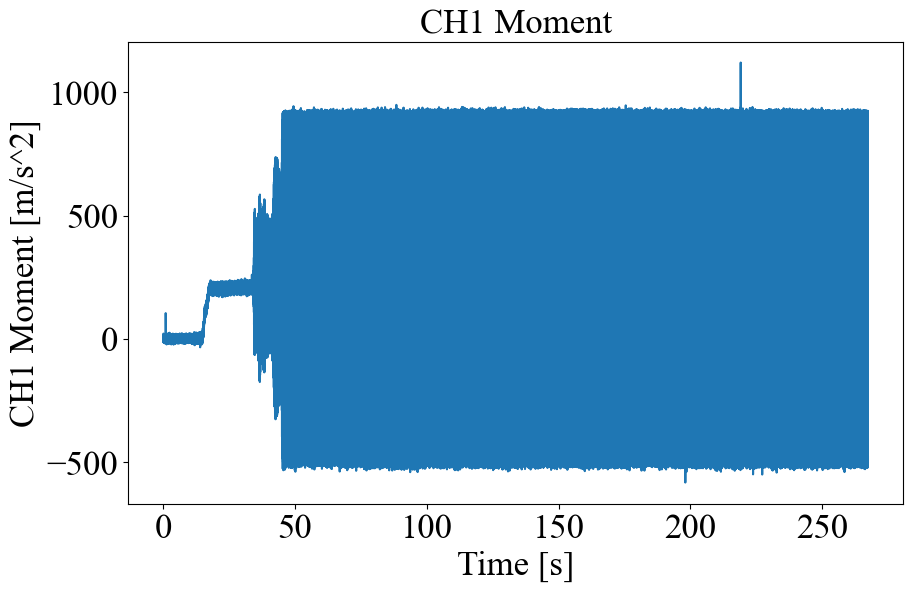

In [146]:
# plot the ch1_moment for the first dataset:
plt.figure(figsize=(10,6))
plt.plot(data['V17_0001']['dat']['time'], data['V17_0001']['dat']['CH1_Moment'])
plt.xlabel("Time [s]", fontsize=25)
plt.ylabel("CH1 Moment [m/s^2]", fontsize=25)

# increase a lot the label size:
plt.tick_params(axis='both', which='major', labelsize=25)

# increase the size of the title:
plt.title("CH1 Moment", fontsize=25)

plt.show()



/Users/aymanehachcham/miniconda3/envs/tad/lib/python3.10/site-packages/ruptures/costs/costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


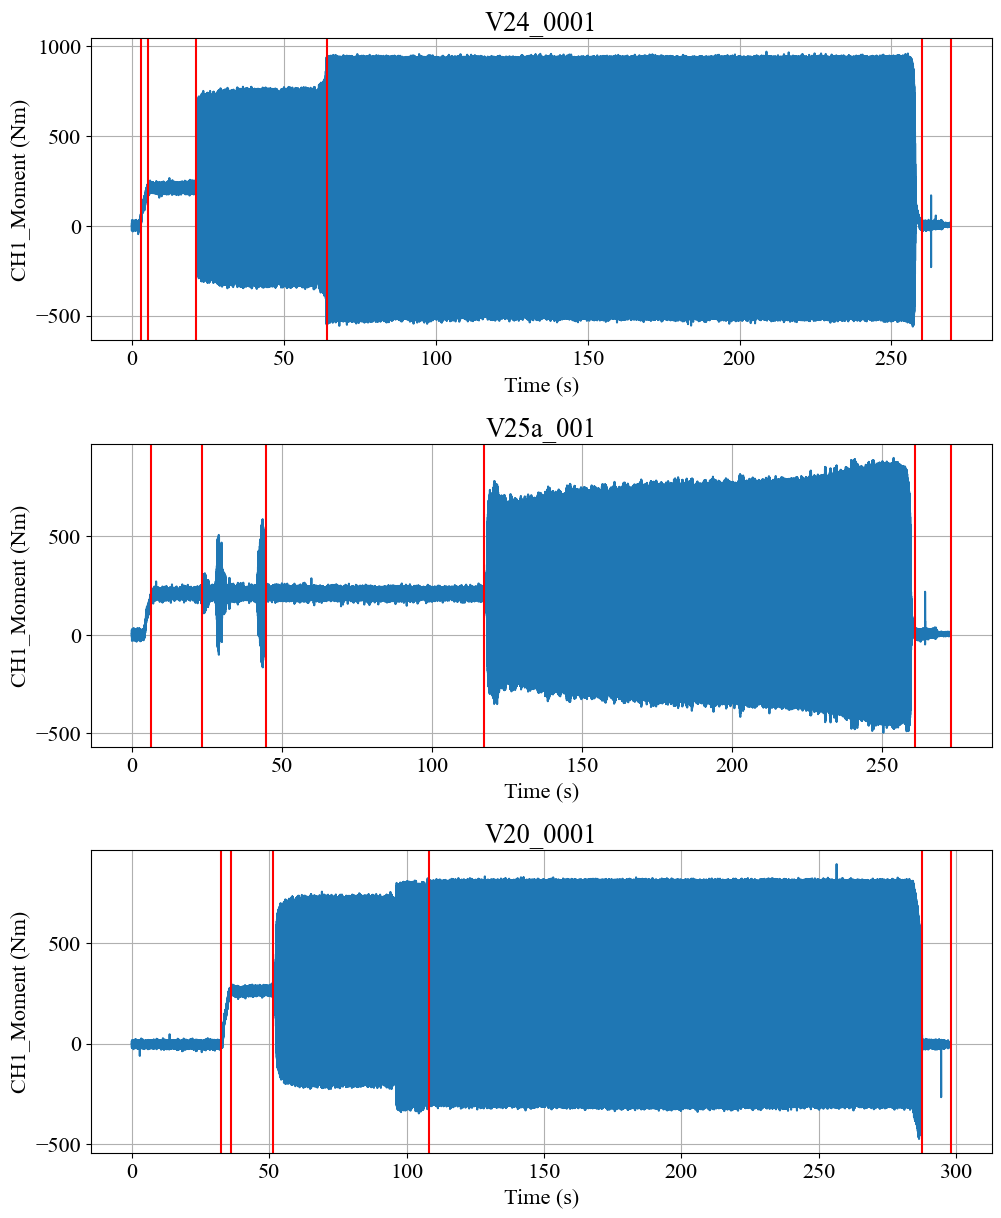

In [81]:
datasets = [
            'V24_0001',
            'V25a_001',
            'V20_0001',
        ]
selected_sensors = ["CH1_Moment"]
changepoints = generate_changepoints(data, selected_sensors)
plot_change_points_mult(datasets, data, changepoints, "CH1_Moment", (10, 12), "D_datasets_CH1_cpt.pdf")

In [82]:
changepoints

{'V2_00001': {'CH1_Moment': {'change_points': 182184       9.10920
   227729      11.38645
   3985304    199.26520
   5306149    265.30745
   5328924    266.44620
   5829935    291.49675
   Name: time, dtype: float64,
   'indexes': [182184, 227729, 3985304, 5306149, 5328924, 5829935]}},
 'V10_0001': {'CH1_Moment': {'change_points': 599344      29.96720
   661349      33.06745
   930019      46.50095
   1818709     90.93545
   5084139    254.20695
   5290813    264.54065
   Name: time, dtype: float64,
   'indexes': [599344, 661349, 930019, 1818709, 5084139, 5290813]}},
 'D0400001': {'CH1_Moment': {'change_points': 109884       5.49420
   4432174    221.60870
   4688581    234.42905
   Name: time, dtype: float64,
   'indexes': [109884, 4432174, 4688581]}},
 'D0600001': {'CH1_Moment': {'change_points': 62924        3.14620
   5097079    254.85395
   5369766    268.48830
   Name: time, dtype: float64,
   'indexes': [62924, 5097079, 5369766]}},
 'D0800001': {'CH1_Moment': {'change_points': 

In [70]:
for dataset in data:
    if dataset != "V2_00001-1":
        print(dataset, data[dataset]["hdr"].comment)

V2_00001 ['vc=120', 'f=0.185']
V10_0001 ['Schneiden', 'v_c=111 m/min', 'f=0.231 mm', 'V_oel=229 l/min']
D0400001 ['vc=111m/min', 'f=0.231mm', 'Dämpfer 1240 mm von Einspannung', 'DiffDruck: 12 bar']
D0600001 ['vc=120m/min', 'f=0.185mm', 'Dämpfer 1240 mm von Einspannung', 'DiffDruck: 12 bar']
D0800001 ['vc=90m/min', 'f=0.250mm', 'Dämpfer 1240 mm von Einspannung', 'DiffDruck: 12 bar']
V6_00001 ['Schneiden', 'v_c=111 m/min', 'f=0.231 mm', 'V_oel=371 l/min']
V17_0001 ['Schneiden', 'v_c=120 m/min', 'f=0.185 mm', 'V_oel=300 l/min']
V20_0001 ['Schneiden', 'v_c=90 m/min', 'f=0.250 mm', 'V_oel=300 l/min']
V24_0001 ['Schneiden', 'v_c=120 m/min', 'f=0.185 mm', 'V_oel=300 l/min']
V25a_001 ['Schneiden', 'v_c=120 m/min', 'f=0.185 mm', 'V_oel=300 l/min']


In [21]:
selected_sensors = ["CH1_Moment", "CH2_Kraft"]
changepoints = generate_changepoints(data, selected_sensors)

/Users/aymanehachcham/miniconda3/envs/tad/lib/python3.10/site-packages/ruptures/costs/costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


In [56]:
first_cp = changepoints['V24_0001']['CH1_Moment']['change_points'].iloc[0]
second_cp = changepoints['V24_0001']['CH1_Moment']['change_points'].iloc[1]

# give back the value for CH1 Moment when time = first_cp
df = data['D0400001']['dat'][['CH1_Moment', 'time']]
values_analyse = df[(df['time'] >= first_cp) & (df['time'] <= second_cp)]

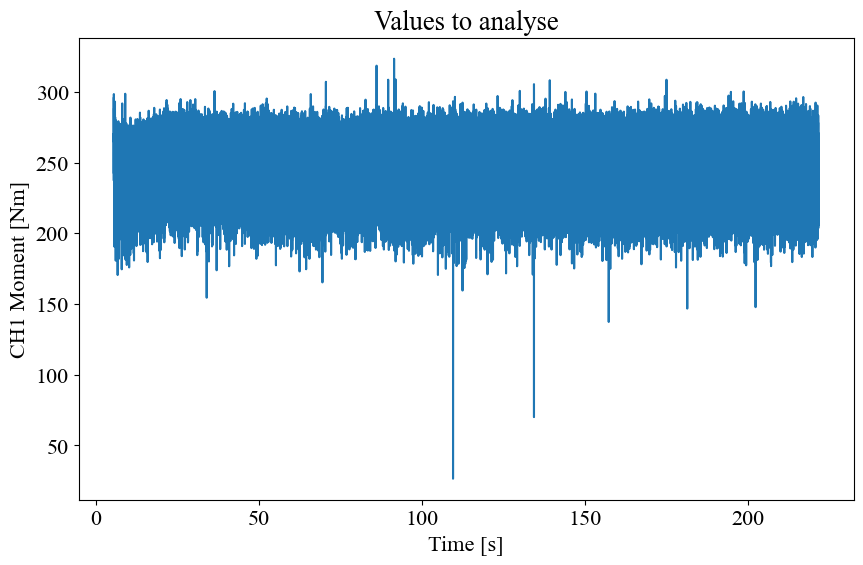

In [57]:
# plot the values to analyse:
plt.figure(figsize=(10,6))
plt.plot(values_analyse['time'], values_analyse['CH1_Moment'])
plt.xlabel("Time [s]")
plt.ylabel("CH1 Moment [Nm]")
plt.title("Values to analyse")
plt.show()



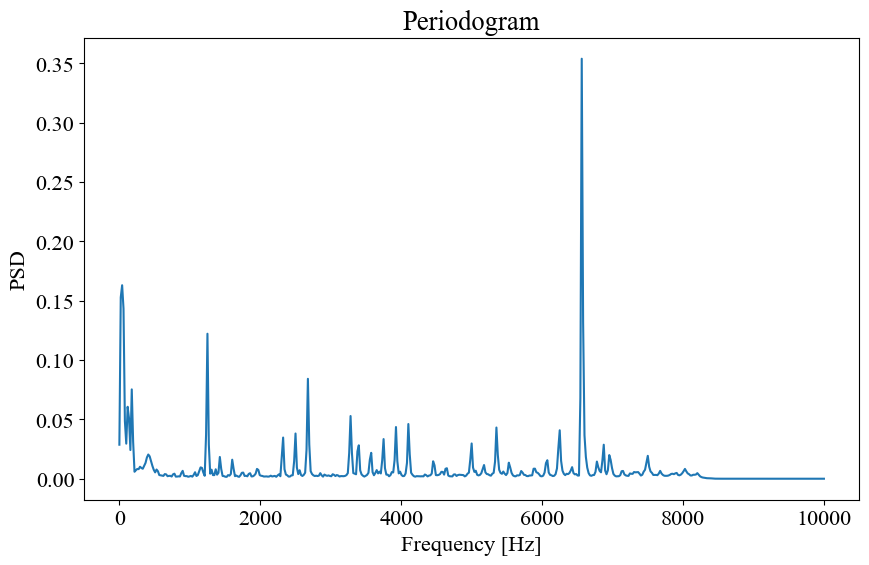

In [62]:
freq, psd, peaks = calculate_eigen_freq(values_analyse['CH1_Moment'], 20000, 2)

# plot the frequencies and psd using periodogram:
plt.figure(figsize=(10,6))
plt.plot(freq, psd)
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD")
plt.title("Periodogram")
plt.show()

In [76]:
values_analyse['CH1_Moment']

109884     270.07228
109885     257.65060
109886     269.87376
109887     276.68016
109888     271.17832
             ...    
4432170    251.24124
4432171    232.46692
4432172    203.59644
4432173    241.99588
4432174    247.44100
Name: CH1_Moment, Length: 4322291, dtype: float64

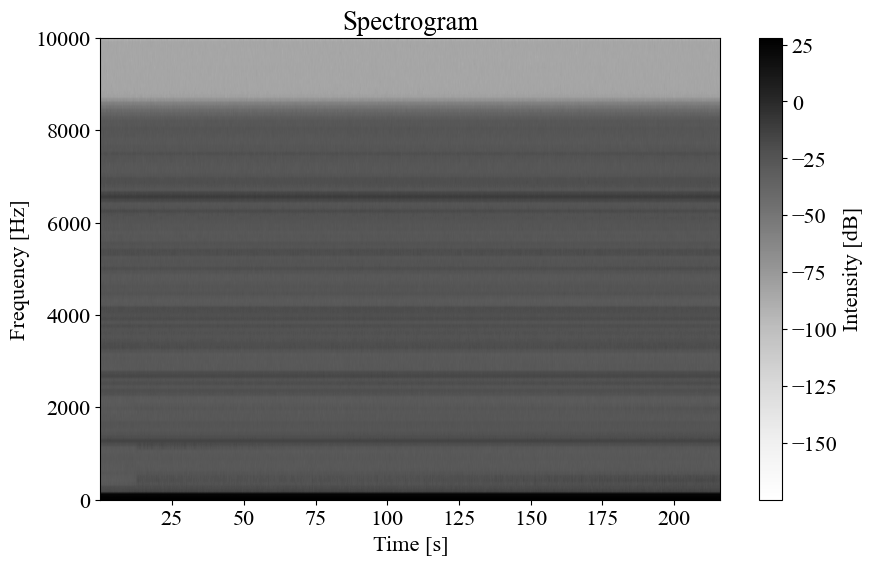

In [66]:
# generate a spectrogram from the values to analyse. Use a scale color map of grey to black:
plt.figure(figsize=(10,6))
plt.specgram(values_analyse['CH1_Moment'], Fs=20000, cmap='Greys')
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.title("Spectrogram")
# Add legend for the color map:
plt.colorbar().set_label("Intensity [dB]")
plt.show()

In [85]:
selected_datasets = {
 'V24_0001':3,
 'V25a_001':3,
 'V20_0001':3,

}

sensor = "CH1_Moment"

eigen_freqs = generate_eigen_freqs(data, changepoints, sensor, selected_datasets, 2)
# plot_eigen_freq(list(selected_datasets.keys()), eigen_freqs, sensor, (10,14), "V_datasets_eig_freq_" + sensor + ".pdf")

# print_freq_infos(eigen_freqs, dataset, sensor)
eigen_freqs['V24_0001']['CH1_Moment']

/Users/aymanehachcham/Documents/TU Dortmund/Case Studies 2023/Case-Studies---Project-2/code/eigen_freq.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  after = sensor_data.loc[breaking_points[cpt]:][0:20000]


{'freq': array([    0.     ,    19.53125,    39.0625 ,    58.59375,    78.125  ,
           97.65625,   117.1875 ,   136.71875,   156.25   ,   175.78125,
          195.3125 ,   214.84375,   234.375  ,   253.90625,   273.4375 ,
          292.96875,   312.5    ,   332.03125,   351.5625 ,   371.09375,
          390.625  ,   410.15625,   429.6875 ,   449.21875,   468.75   ,
          488.28125,   507.8125 ,   527.34375,   546.875  ,   566.40625,
          585.9375 ,   605.46875,   625.     ,   644.53125,   664.0625 ,
          683.59375,   703.125  ,   722.65625,   742.1875 ,   761.71875,
          781.25   ,   800.78125,   820.3125 ,   839.84375,   859.375  ,
          878.90625,   898.4375 ,   917.96875,   937.5    ,   957.03125,
          976.5625 ,   996.09375,  1015.625  ,  1035.15625,  1054.6875 ,
         1074.21875,  1093.75   ,  1113.28125,  1132.8125 ,  1152.34375,
         1171.875  ,  1191.40625,  1210.9375 ,  1230.46875,  1250.     ,
         1269.53125,  1289.0625 ,  1308.593

/Users/aymanehachcham/Documents/TU Dortmund/Case Studies 2023/Case-Studies---Project-2/code/eigen_freq.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  after = sensor_data.loc[breaking_points[cpt]:][0:20000]


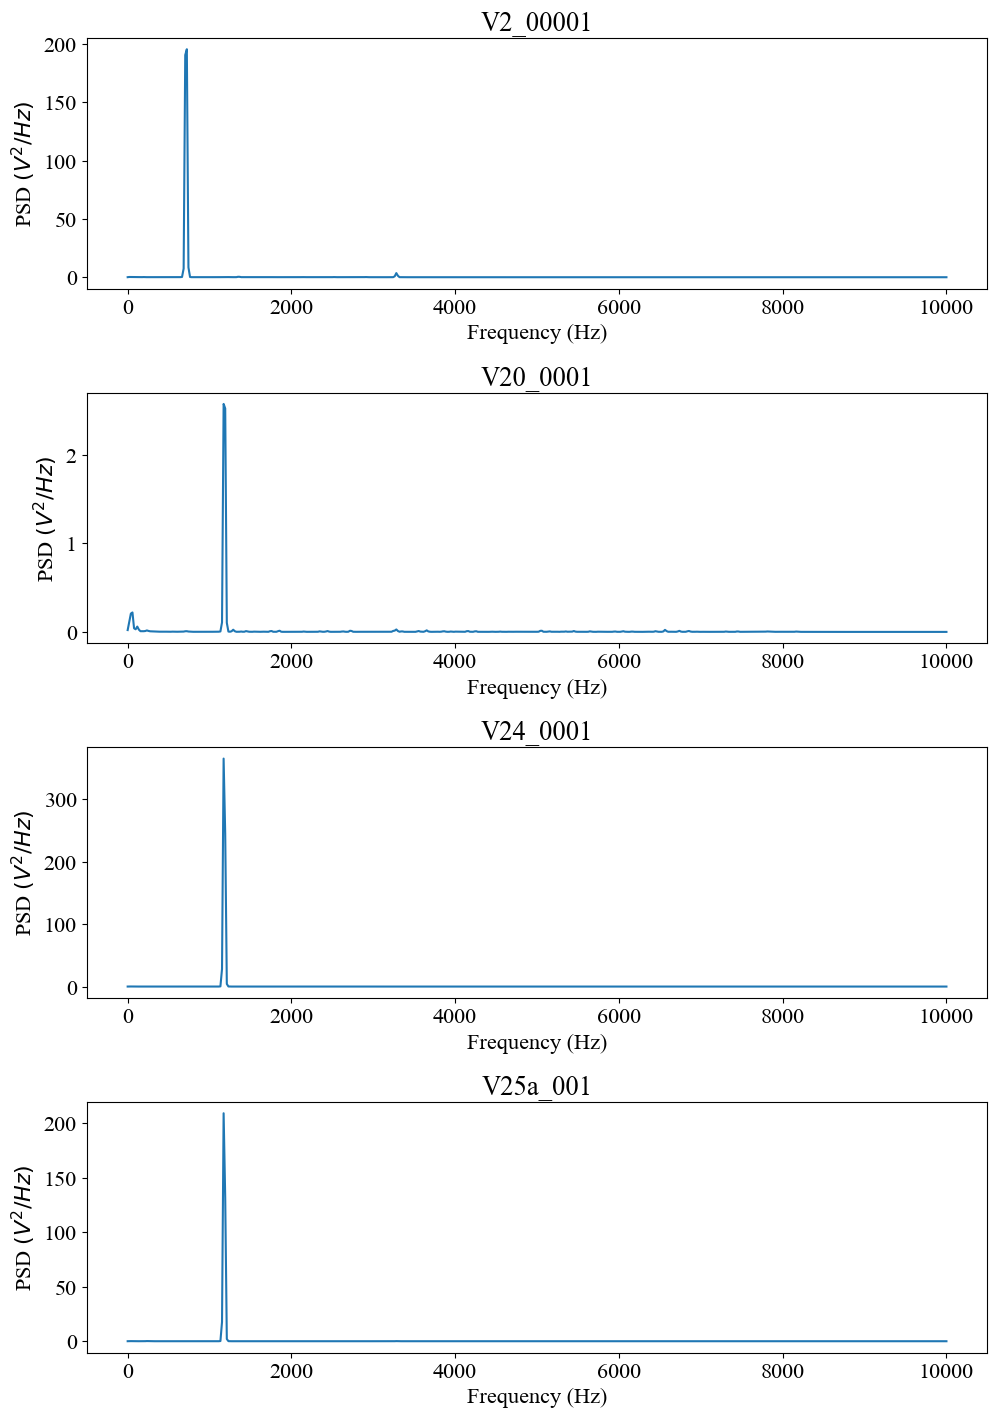

V2_00001
{'top_freq': array([], dtype=float64), 'top_psds': array([], dtype=float64)}
V20_0001
{'top_freq': array([], dtype=float64), 'top_psds': array([], dtype=float64)}
V24_0001
{'top_freq': array([], dtype=float64), 'top_psds': array([], dtype=float64)}
V25a_001
{'top_freq': array([], dtype=float64), 'top_psds': array([], dtype=float64)}


In [111]:
selected_datasets = {
 'V2_00001':3,
 'V20_0001':3,
 'V24_0001':3,
 'V25a_001':3
}

sensor = "CH1_Moment"

eigen_freqs = generate_eigen_freqs(data, changepoints, sensor, selected_datasets, 5000)
plot_eigen_freq(list(selected_datasets.keys()), eigen_freqs, sensor, (10,14), "V_datasets_eig_freq_" + sensor + ".pdf")

print_freq_infos(eigen_freqs, dataset, sensor)

/var/folders/kl/77dw97d55y1_kplchw9htctc0000gn/T/ipykernel_62312/1993924597.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  after_cpt = data['V24_0001']['dat']['CH1_Moment'].loc[cpt_indexes[3]:][0:20000]


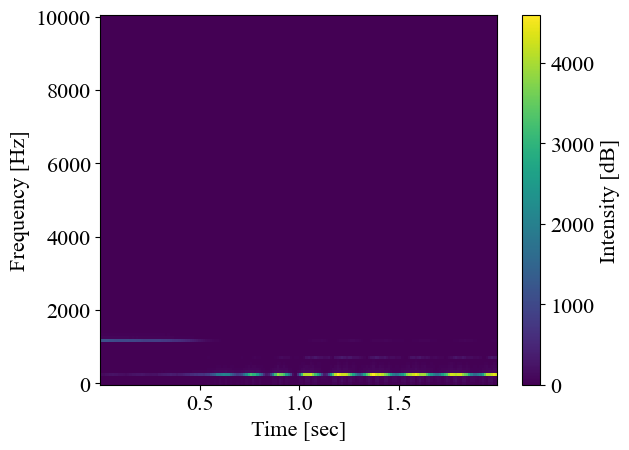

In [113]:
cpt_indexes = changepoints['V24_0001']['CH1_Moment']['indexes']
before_cpt = data['V24_0001']['dat']['CH1_Moment'].loc[:cpt_indexes[3]][-20000:]
after_cpt = data['V24_0001']['dat']['CH1_Moment'].loc[cpt_indexes[3]:][0:20000]

data_bf_af = np.concatenate((before_cpt.values.reshape(-1), after_cpt.values.reshape(-1)))

# Compute the spectrogram using the signal.spectrogram function
f, t, Sxx = signal.spectrogram(data_bf_af, 20000)

# Plot the spectrogram using the matplotlib.pcolormesh function
fig, ax = plt.subplots()
ax.pcolormesh(t, f, Sxx)
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Frequency [Hz]')

# add legend for the color map
fig.colorbar(ax.pcolormesh(t, f, Sxx)).set_label("Intensity [dB]")

plt.show()

In [ ]:
# detect exactly at what time the frequency

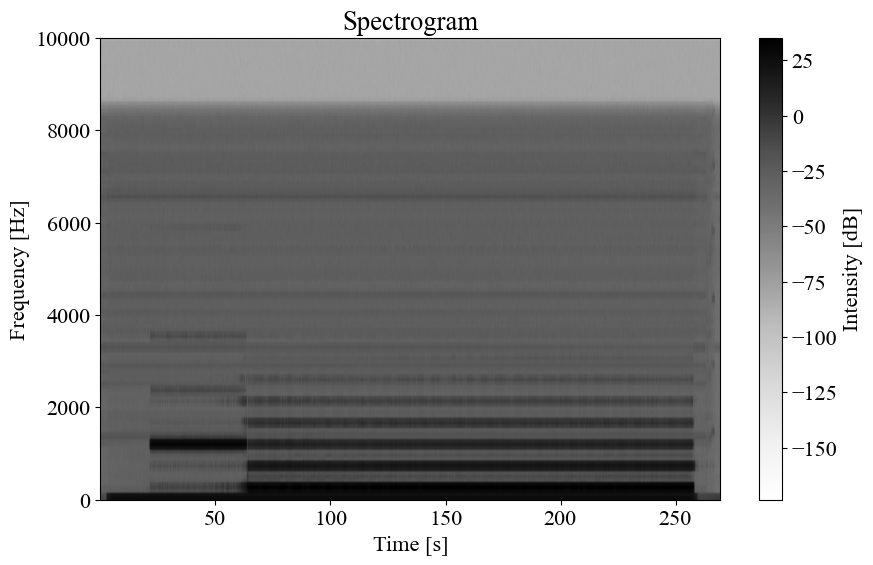

In [77]:
# Plot a pectrogram for the first dataset:
plt.figure(figsize=(10,6))
plt.specgram(data['V24_0001']['dat']['CH1_Moment'], Fs=20000, cmap='Greys')
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.title("Spectrogram")
# Add legend for the color map:
plt.colorbar().set_label("Intensity [dB]")
plt.show()
# eigen_freqs['V24_0001']['CH1_Moment']['freq']

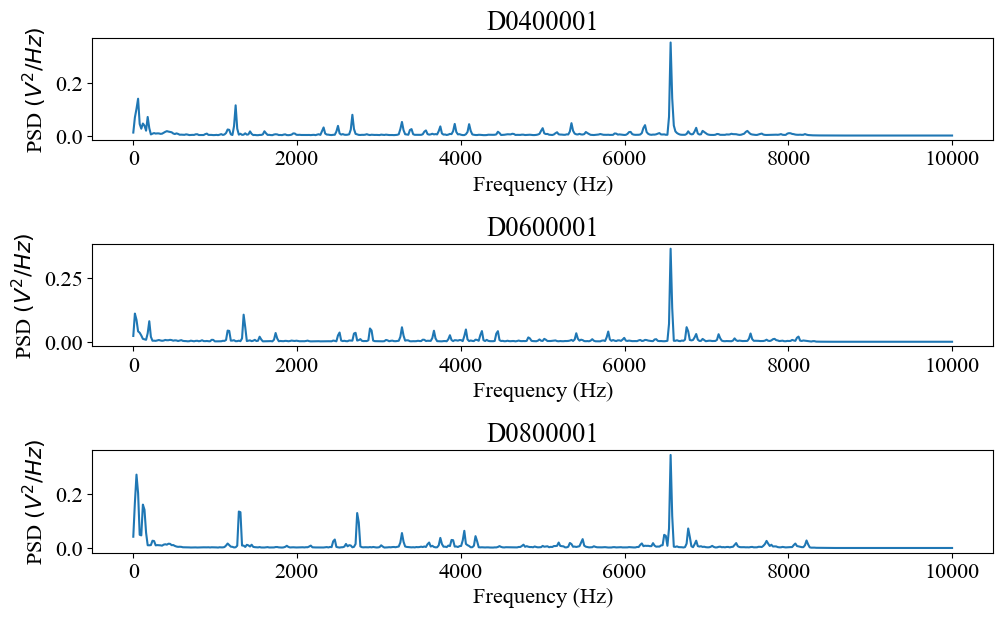

D0400001
{'top_freq': array([6562.5]), 'top_psds': array([0.35361143])}
D0600001
{'top_freq': array([6562.5]), 'top_psds': array([0.36579765])}
D0800001
{'top_freq': array([6562.5   ,   39.0625]),
 'top_psds': array([0.34532465, 0.27223822])}


In [10]:
sensor = "CH1_Moment"

similar_datasets = ['V6_00001', 'V17_0001', 'V20_0001']
d_datasets = ['D0400001', 'D0600001', 'D0800001']
cgpt_indices = {}
for i in range(len(d_datasets)):
    cgpt_indices[d_datasets[i]] = changepoints[similar_datasets[i]][sensor]["indexes"] 
similar_datasets_cpts = {
 'D0400001':3,
 'D0600001':3,
 'D0800001':3
}

eigen_freqs = generate_eigen_freqs(data, cgpt_indices, sensor, similar_datasets_cpts, 0.2)
plot_eigen_freq(d_datasets, eigen_freqs, sensor, (10,6), "D_datasets_eig_freq_" + sensor + ".pdf")
print_freq_infos(eigen_freqs, dataset, sensor)

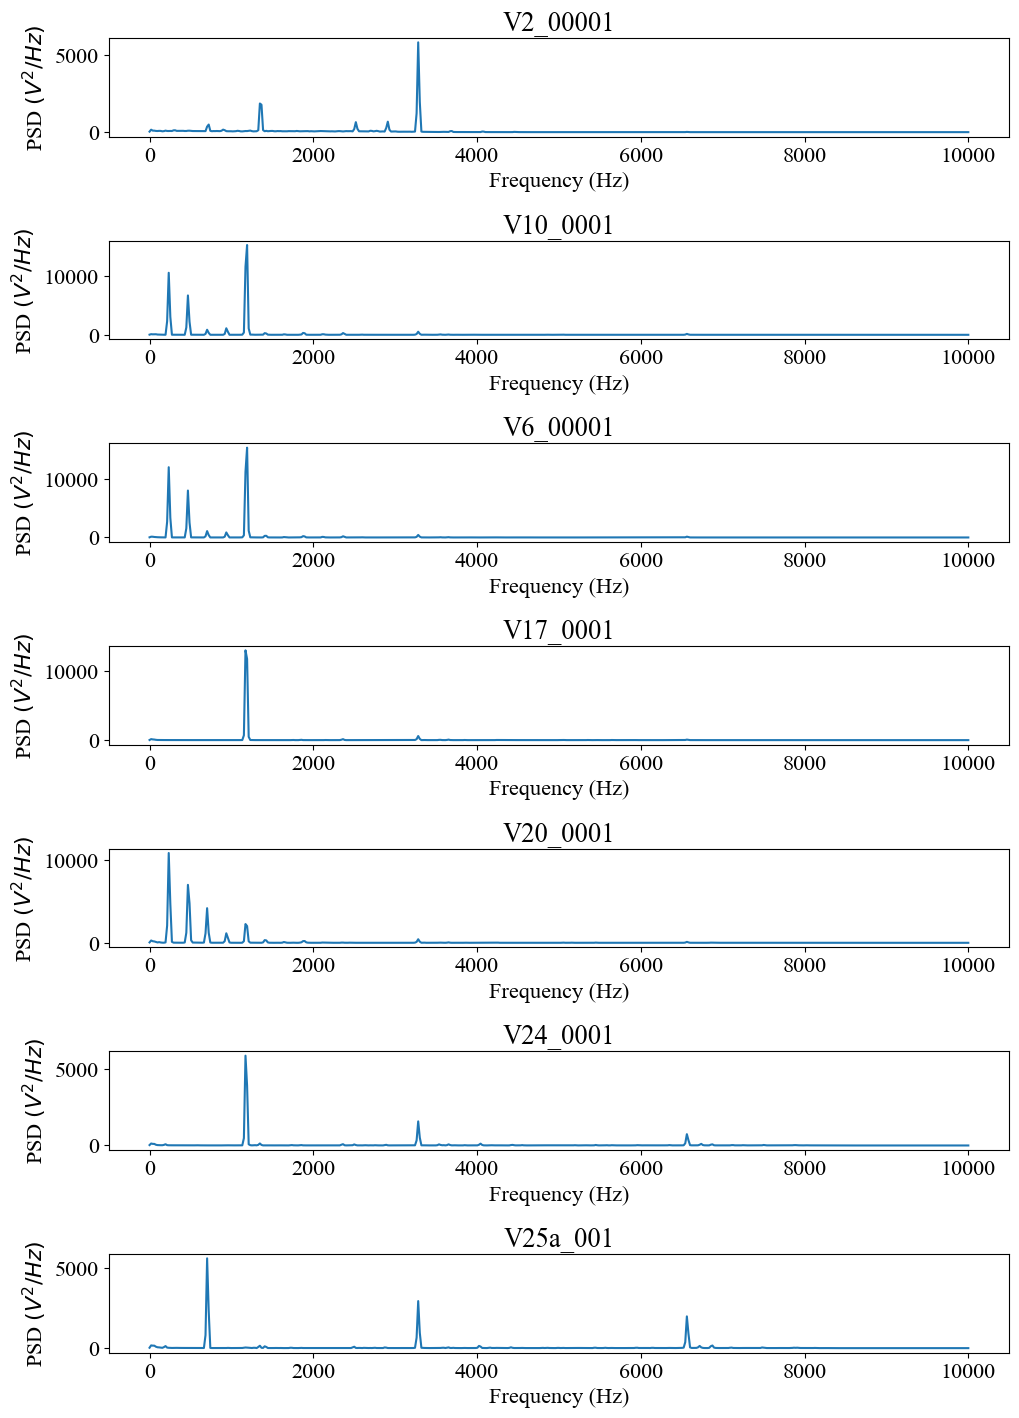

V2_00001
{'top_freq': array([3281.25]), 'top_psds': array([5813.45166191])}
V10_0001
{'top_freq': array([1191.40625,  468.75   ,  234.375  ]),
 'top_psds': array([15346.56605122,  6727.63582089, 10600.94272098])}
V6_00001
{'top_freq': array([1191.40625,  468.75   ,  234.375  ]),
 'top_psds': array([15378.13387799,  8037.77254497, 12031.11493186])}
V17_0001
{'top_freq': array([1171.875]), 'top_psds': array([12924.62602666])}
V20_0001
{'top_freq': array([468.75 , 234.375]),
 'top_psds': array([ 7002.29985537, 10848.63957717])}
V24_0001
{'top_freq': array([1171.875]), 'top_psds': array([5864.1269825])}
V25a_001
{'top_freq': array([703.125]), 'top_psds': array([5594.24601724])}


In [11]:
selected_datasets = {
 'V2_00001':2,
 'V10_0001':4,
 'V6_00001':4,
 'V17_0001':3,
 'V20_0001':4,
 'V24_0001':3,
 'V25a_001':3
}

sensor = "CH2_Kraft"

eigen_freqs = generate_eigen_freqs(data, changepoints, sensor, selected_datasets, 5000)
plot_eigen_freq(list(selected_datasets.keys()), eigen_freqs, sensor, (10,14), "V_datasets_eig_freq_" + sensor + ".pdf")

print_freq_infos(eigen_freqs, dataset, sensor)

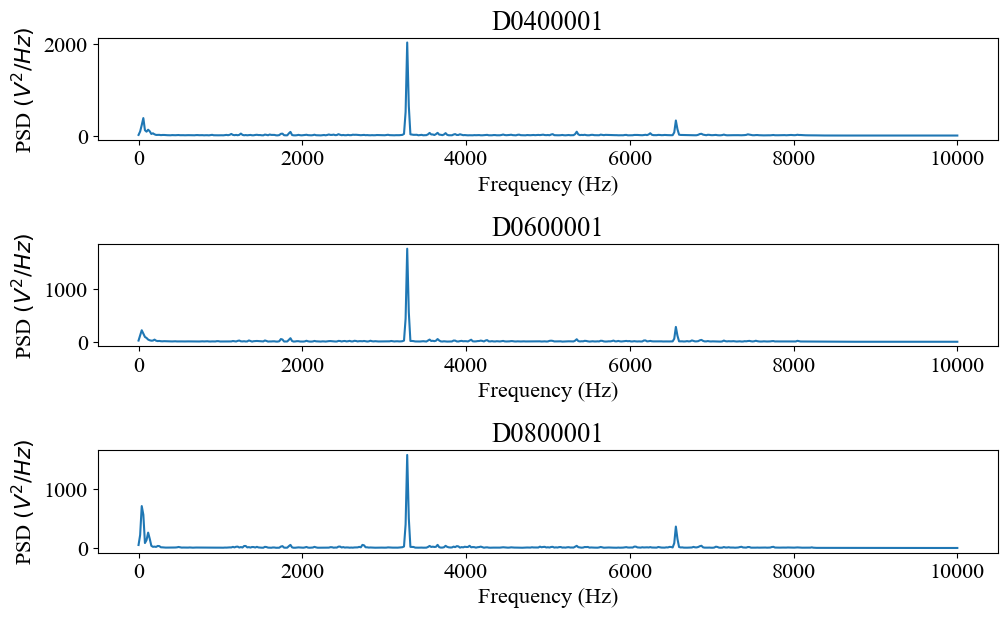

D0400001
{'top_freq': array([6562.5    , 3281.25   ,   58.59375]),
 'top_psds': array([ 327.32526955, 2025.6713588 ,  380.38622428])}
D0600001
{'top_freq': array([6562.5 , 3281.25]),
 'top_psds': array([ 280.27797095, 1758.20570867])}
D0800001
{'top_freq': array([6562.5   , 3281.25  ,  117.1875,   39.0625]),
 'top_psds': array([ 362.12862965, 1573.26105253,  259.88264076,  708.51283175])}


In [12]:
sensor = "CH2_Kraft"

similar_datasets = ['V6_00001', 'V17_0001', 'V20_0001']
d_datasets = ['D0400001', 'D0600001', 'D0800001']
cgpt_indices = {}
for i in range(len(d_datasets)):
    cgpt_indices[d_datasets[i]] = changepoints[similar_datasets[i]][sensor]["indexes"] 
similar_datasets_cpts = {
 'D0400001':3,
 'D0600001':3,
 'D0800001':3
}

eigen_freqs = generate_eigen_freqs(data, cgpt_indices, sensor, similar_datasets_cpts, 250)
plot_eigen_freq(d_datasets, eigen_freqs, sensor, (10,6), "D_datasets_eig_freq_" + sensor + ".pdf")
print_freq_infos(eigen_freqs, dataset, sensor)